# Heart Failure Prediction

## 1. 프로젝트 개요

본 프로젝트는 심부전(Heart Failure) 환자의 임상 데이터를 활용하여 **사망 여부(DEATH_EVENT)** 를 예측하는 이진 분류 모델을 구축하는 것을 목표로 한다.

- 데이터 출처: Kaggle – Heart Failure Clinical Records (https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data/data)

- 문제 유형: Binary Classification

- Target 변수: `DEATH_EVENT` (0 = 생존, 1 = 사망)

- 데이터 구성 (299행 × 13열)

    | 컬럼명 | 설명 |
    | --- | --- |
    | age | 환자 나이 |
    | anaemia | 빈혈 여부 (0 = 없음, 1 = 있음) |
    | creatinine_phosphokinase | CPK 효소 수치 (mcg/L) |
    | diabetes | 당뇨병 여부 |
    | ejection_fraction | 좌심실 박출률 (%) |
    | high_blood_pressure | 고혈압 여부 |
    | platelets | 혈소판 수치 (kiloplatelets/mL) |
    | serum_creatinine | 혈청 크레아티닌 수치 (mg/dL) |
    | serum_sodium | 혈청 나트륨 농도 (mEq/L) |
    | sex | 성별 (0 = 여성, 1 = 남성) |
    | smoking | 흡연 여부 |
    | time | 추적 관찰 기간 (days) |
    | DEATH_EVENT | 사망 여부 (0 = 생존, 1 = 사망) → **Target** |

## 2. 데이터 로드 및 기본 확인

In [33]:
import numpy as np
import pandas as pd

df_origin = pd.read_csv('./data/heart_failure_clinical_records_dataset.csv')
data = df_origin.copy()

data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [34]:
data.shape

(299, 13)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [36]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## 3. Target 변수 확인

In [37]:
target = data.pop('DEATH_EVENT')
display(target.value_counts())
display(target.value_counts(normalize=True))

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

DEATH_EVENT
0    0.67893
1    0.32107
Name: proportion, dtype: float64

- 생존(0): 약 68%
- 사망(1): 약 32%
- 다소 불균형

## 4. Train / Test 데이터 분리

In [38]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42, stratify=target
)

print(train_input.shape, test_input.shape)

(239, 12) (60, 12)


stratify 매개변수에 타겟 데이터를 전달하면 클래스 비율에 맞게 데이터를 나눔.

In [39]:
print(train_target.value_counts(normalize=True))
print(test_target.value_counts(normalize=True))

DEATH_EVENT
0    0.677824
1    0.322176
Name: proportion, dtype: float64
DEATH_EVENT
0    0.683333
1    0.316667
Name: proportion, dtype: float64


## 5. 탐색적 데이터 분석(EDA)

In [40]:
# 모델링 및 시각화를 위해 이진 변수와 연속형 변수를 구분함.

binary_cols = [
    'anaemia', 'diabetes', 'high_blood_pressure',
    'sex', 'smoking'
]

continuous_cols = [
    'age', 'creatinine_phosphokinase', 'ejection_fraction',
    'platelets', 'serum_creatinine', 'serum_sodium', 'time'
]

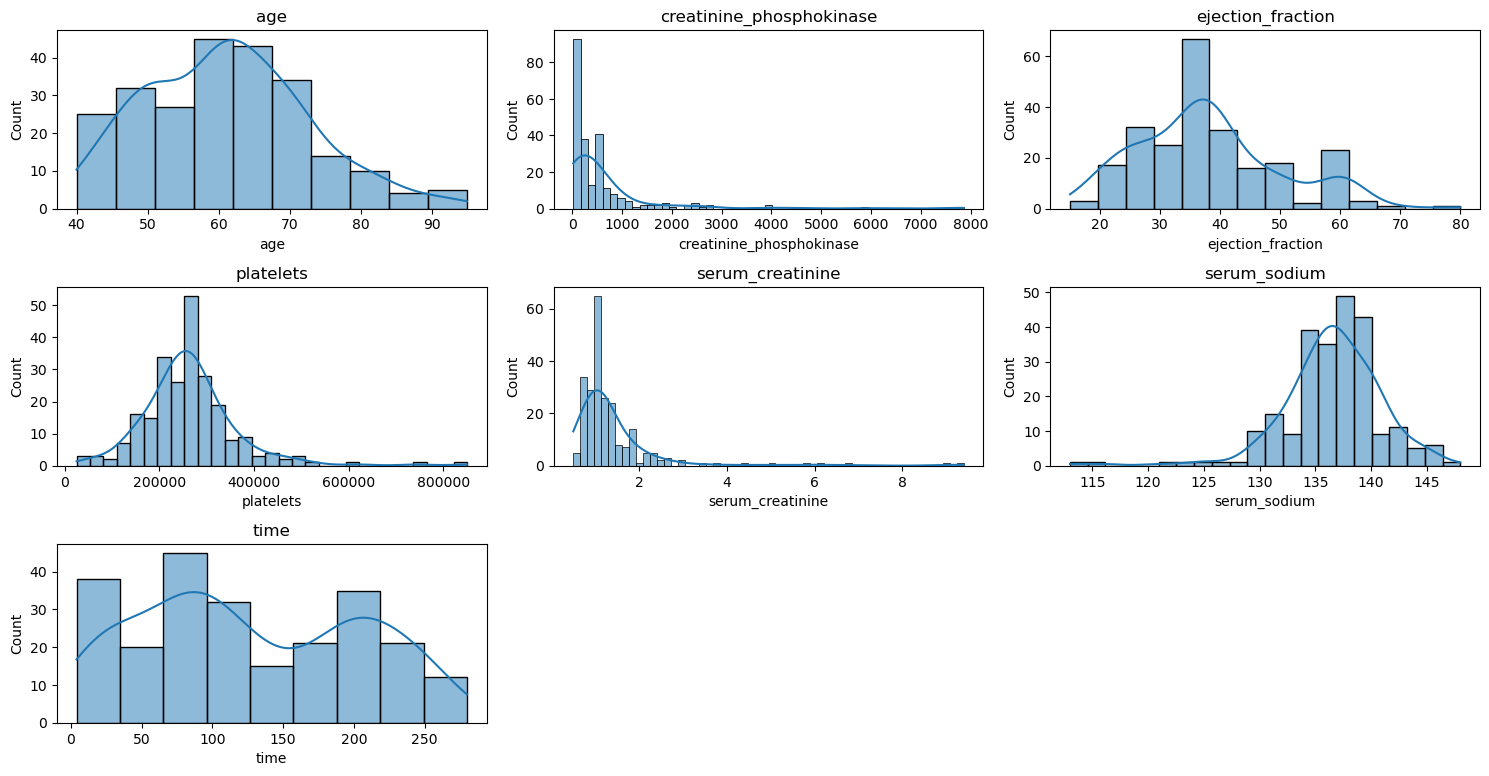

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
for i, col in enumerate(continuous_cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(train_input[col], kde=True)
    plt.title(col)
    plt.tight_layout()
    plt.plot()


의료 데이터 특성상, 이상치가 사망률에 영향을 미칠 수 있기 때문에 제거하지 않음.

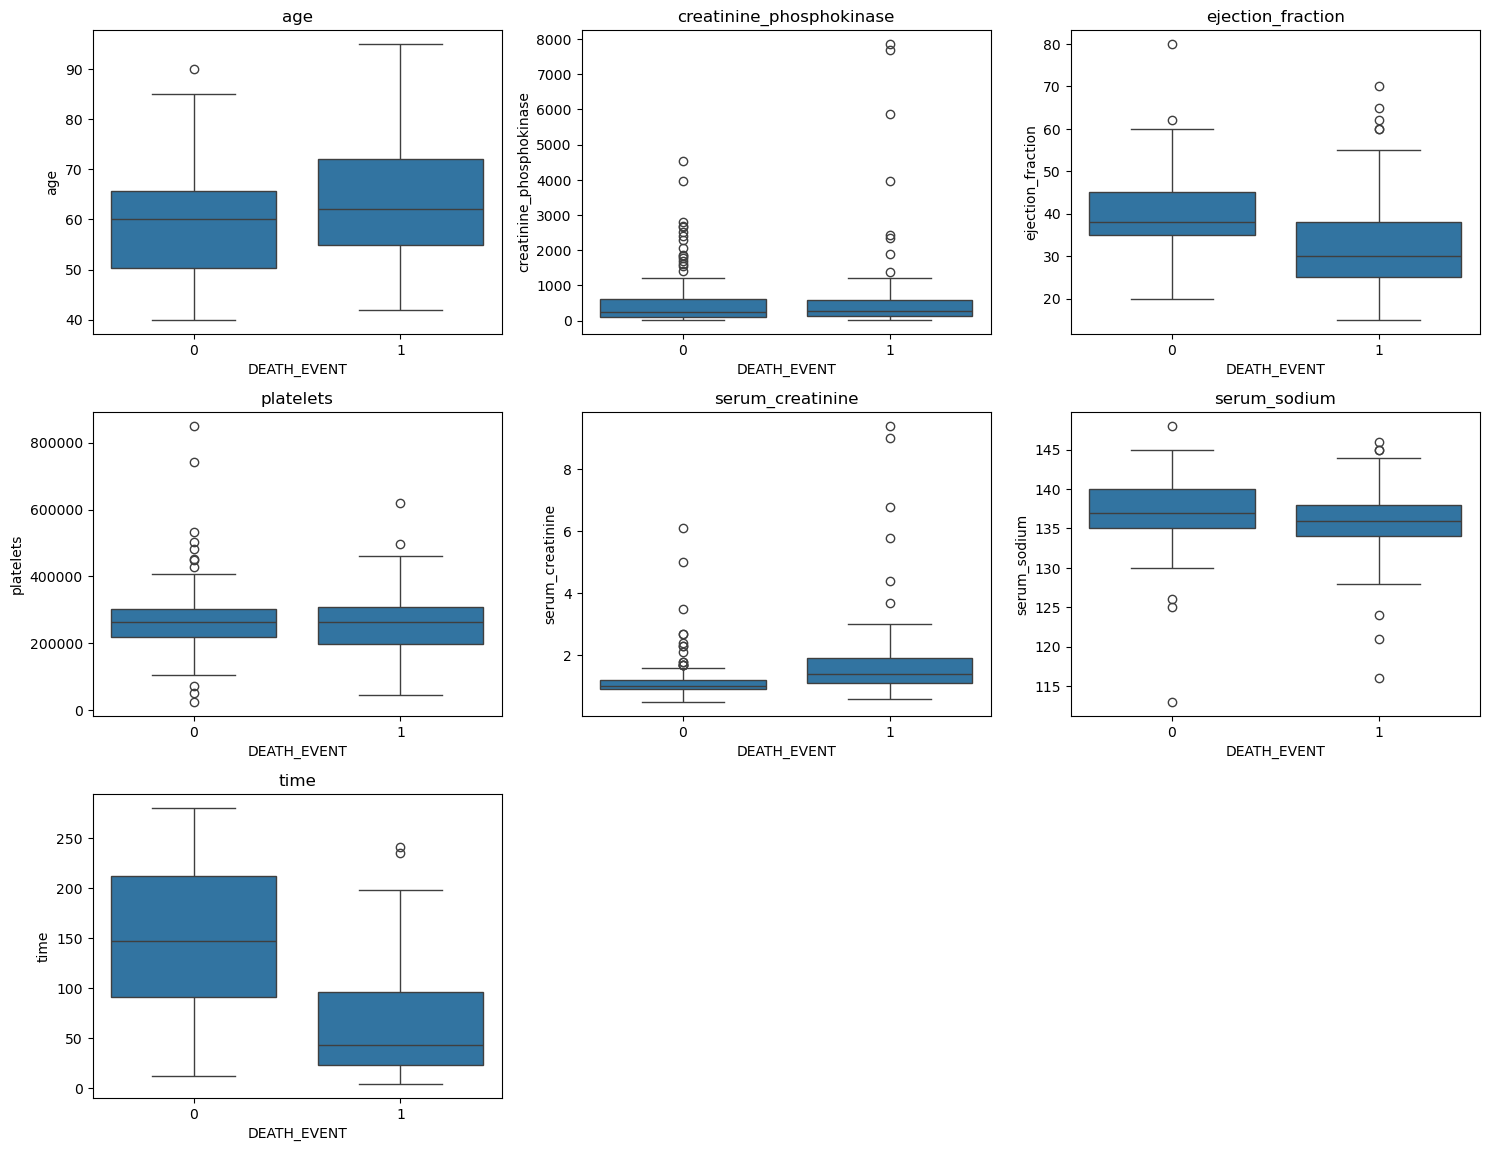

In [42]:
plt.figure(figsize=(15,15))
for i, col in enumerate(continuous_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=train_target, y=train_input[col])
    plt.title(col)
    plt.tight_layout()
    plt.plot()

- ejection_fraction: 사망군에서 낮음

- serum_creatinine: 사망군에서 높음

- time: 사망군의 관찰 기간이 짧음

In [43]:
for col in binary_cols:
    print(f"[{col}]")
    display(pd.crosstab(train_input[col], train_target, normalize="index"))

[anaemia]


DEATH_EVENT,0,1
anaemia,,
0,0.712121,0.287879
1,0.635514,0.364486


[diabetes]


DEATH_EVENT,0,1
diabetes,,
0,0.696970,0.303030
1,0.654206,0.345794


[high_blood_pressure]


DEATH_EVENT,0,1
high_blood_pressure,,
0,0.713333,0.286667
1,0.617978,0.382022


[sex]


DEATH_EVENT,0,1
sex,,
0,0.686047,0.313953
1,0.673203,0.326797


[smoking]


DEATH_EVENT,0,1
smoking,,
0,0.687117,0.312883
1,0.657895,0.342105


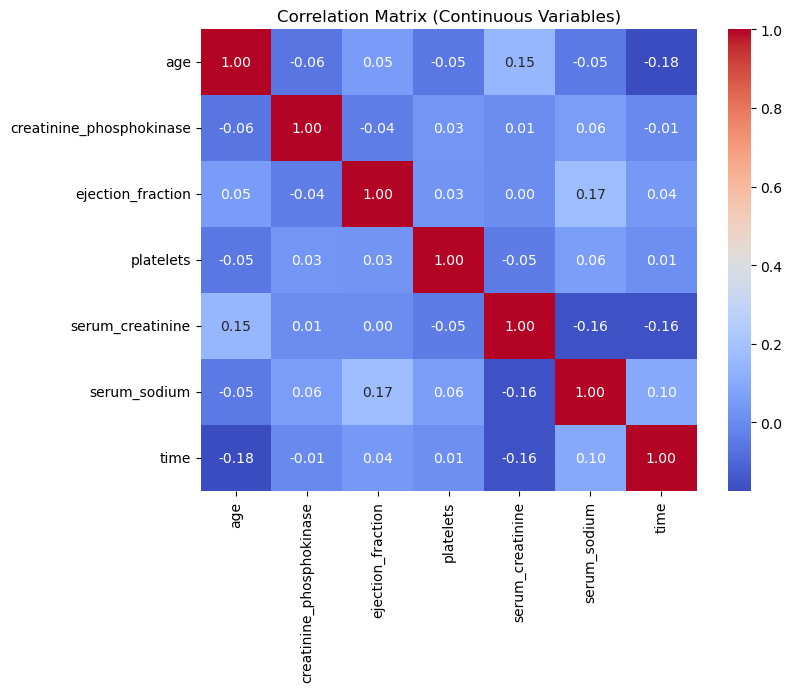

In [44]:
corr = train_input[continuous_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Continuous Variables)')
plt.show()


## 6. 모델링 & 평가

### 스케일링

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_scaled = train_input.copy()
test_scaled = test_input.copy()

train_scaled[continuous_cols] = scaler.fit_transform(train_input[continuous_cols])
test_scaled[continuous_cols] = scaler.transform(test_input[continuous_cols])

In [46]:
display(train_input[continuous_cols].describe())
display(train_scaled[continuous_cols].describe())

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000
mean,61.072527,602.790795,37.887029,263670.546444,1.391715,136.527197,127.217573
std,11.443865,1012.362885,11.994738,99410.331023,1.089060,4.425657,77.575734
min,40.000000,23.000000,15.000000,25100.000000,0.500000,113.000000,4.000000
25%,51.500000,117.000000,30.000000,212500.000000,0.900000,134.000000,69.500000
50%,60.000000,253.000000,38.000000,263358.030000,1.100000,137.000000,112.000000
75%,69.500000,582.000000,45.000000,303500.000000,1.400000,139.000000,197.500000
max,95.000000,7861.000000,80.000000,850000.000000,9.400000,148.000000,280.000000


,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02
mean,4.533798e-16,3.716228e-17,1.913857e-16,-5.574342e-16,-4.831096e-17,2.883328e-15,1.858114e-18
std,1.002099e+00,1.002099e+00,1.002099e+00,1.002099e+00,1.002099e+00,1.002099e+00,1.002099e+00
min,-1.845246e+00,-5.739124e-01,-1.912094e+00,-2.404893e+00,-8.205122e-01,-5.327248e+00,-1.591685e+00
25%,-8.382323e-01,-4.808654e-01,-6.589207e-01,-5.158210e-01,-4.524521e-01,-5.722315e-01,-7.455772e-01
50%,-9.391740e-02,-3.462443e-01,9.438122e-03,-3.150299e-03,-2.684221e-01,1.070565e-01,-1.965758e-01
75%,7.379639e-01,-2.058000e-02,5.942521e-01,4.014979e-01,7.623002e-03,5.599152e-01,9.078860e-01
max,2.970908e+00,7.184619e+00,3.518322e+00,5.910452e+00,7.368825e+00,2.597779e+00,1.973595e+00


### K-NN

In [115]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_scaled, train_target)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [ ]:
from sklearn.metrics import accuracy_score

train_score = knn.score(train_scaled, train_target)
test_score = knn.score(test_scaled, test_target)

train_score, test_score

(0.8493723849372385, 0.7166666666666667)

과대적합 경향이 있음.

In [117]:
scoring = {
    "accuracy": "accuracy",
    "recall": "recall",      # 사망(class 1)
    "f1": "f1",
    "roc_auc": "roc_auc"
}

In [118]:
from sklearn.model_selection import StratifiedKFold

splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [119]:
from sklearn.model_selection import cross_validate

results = []
for k in [3, 5, 7, 9]:
    knn = KNeighborsClassifier(n_neighbors=k)

    cv_result = cross_validate(
        knn, train_scaled, train_target, cv=splitter, scoring=scoring, return_train_score=True
    )
    
    results.append({
        "Model": f"k-NN (k={k})",
        "Accuracy_mean": cv_result["test_accuracy"].mean(),
        "Recall_mean": cv_result["test_recall"].mean(),
        "F1_mean": cv_result["test_f1"].mean(),
        "ROC_AUC_mean": cv_result["test_roc_auc"].mean()
    })

In [120]:
baseline_knn_df = pd.DataFrame(results)
baseline_knn_df

,Model,Accuracy_mean,Recall_mean,F1_mean,ROC_AUC_mean
0,k-NN (k=3),0.770471,0.471429,0.567699,0.767532
1,k-NN (k=5),0.787319,0.498214,0.593843,0.795910
2,k-NN (k=7),0.782790,0.457143,0.572261,0.815369
3,k-NN (k=9),0.757609,0.378571,0.489715,0.826572


In [121]:
print("CV Train Recall:", cv_result["train_recall"].mean())
print("CV Valid Recall:", cv_result["test_recall"].mean())

CV Train Recall: 0.48627329192546587
CV Valid Recall: 0.37857142857142856


### 로지스틱 회귀

In [122]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
    max_iter=1000,
    random_state=42
)

lr.fit(train_scaled, train_target)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [123]:
train_score = lr.score(train_scaled, train_target)
test_score = lr.score(test_scaled, test_target)

train_score, test_score

(0.8577405857740585, 0.8166666666666667)

In [126]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

results = []

lr = LogisticRegression(
    max_iter=1000,
    random_state=42
)

cv_result = cross_validate(
    lr, train_scaled, train_target, cv=splitter, scoring=scoring, return_train_score=True
)

results.append({
    "Model": f"Logistic Regression",
    "Accuracy_mean": cv_result["test_accuracy"].mean(),
    "Recall_mean": cv_result["test_recall"].mean(),
    "F1_mean": cv_result["test_f1"].mean(),
    "ROC_AUC_mean": cv_result["test_roc_auc"].mean()
})

baseline_lr_df = pd.DataFrame(results)
baseline_lr_df

,Model,Accuracy_mean,Recall_mean,F1_mean,ROC_AUC_mean
0,Logistic Regression,0.845652,0.714286,0.752775,0.876963


In [127]:
print("CV Train Recall:", cv_result["train_recall"].mean())
print("CV Valid Recall:", cv_result["test_recall"].mean())

CV Train Recall: 0.7243892339544513
CV Valid Recall: 0.7142857142857142


### 확률적 경사 하강법 (SGDClassifier)

In [129]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold

splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

results = []

sgd = SGDClassifier(
    loss="log_loss",
    max_iter=1000,
    tol=None,
    random_state=42
)

cv_result = cross_validate(
    sgd, train_scaled, train_target, cv=splitter, scoring=scoring, return_train_score=True
)

results.append({
    "Model": "SGDClassifier",
    "Accuracy_mean": cv_result["test_accuracy"].mean(),
    "Recall_mean": cv_result["test_recall"].mean(),
    "F1_mean": cv_result["test_f1"].mean(),
    "ROC_AUC_mean": cv_result["test_roc_auc"].mean()
})

baseline_sgd_df = pd.DataFrame(results)
baseline_sgd_df

,Model,Accuracy_mean,Recall_mean,F1_mean,ROC_AUC_mean
0,SGDClassifier,0.833152,0.714286,0.735394,0.872335


In [130]:
print("CV Train Recall:", cv_result["train_recall"].mean())
print("CV Valid Recall:", cv_result["test_recall"].mean())

CV Train Recall: 0.7157556935817805
CV Valid Recall: 0.7142857142857142


## 랜덤 포레스트

In [131]:
from sklearn.ensemble import RandomForestClassifier

splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

results = []

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)

cv_result = cross_validate(
    rf, train_input, train_target, cv=splitter, scoring=scoring, return_train_score=True
)

results.append({
    "Model": "Random Forest",
    "Accuracy_mean": cv_result["test_accuracy"].mean(),
    "Recall_mean": cv_result["test_recall"].mean(),
    "F1_mean": cv_result["test_f1"].mean(),
    "ROC_AUC_mean": cv_result["test_roc_auc"].mean()
})

baseline_rf_df = pd.DataFrame(results)
baseline_rf_df

,Model,Accuracy_mean,Recall_mean,F1_mean,ROC_AUC_mean
0,Random Forest,0.858152,0.728571,0.772125,0.913337


In [132]:
print("CV Train Recall:", cv_result["train_recall"].mean())
print("CV Valid Recall:", cv_result["test_recall"].mean())

CV Train Recall: 1.0
CV Valid Recall: 0.7285714285714285
